## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pyplot as plt

In [2]:
# your answer here
mean = 2.435
score = [0, 1, 2, 3, 4, 5, 6, 7]
times = [35,99,104,110,62,25,10,3]
rugby = [[i, times[i]] for i in score]
rugby = pd.DataFrame(rugby, columns = ['score', 'times'])
rugby['probability'] = sc.poisson.pmf(rugby['score'], mean)
rugby['expected'] = rugby["probability"] * rugby["times"].sum()

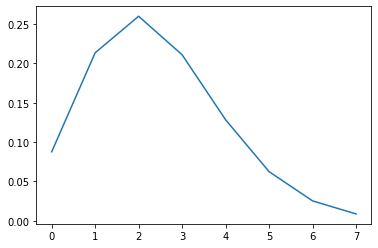

In [3]:
plt.plot(score, rugby['probability'])
plt.show()

In [7]:
sc.chisquare(rugby["times"], rugby["expected"])[1]

0.5959787428784398

As the p-value is higher than our alpha value we have to accept the null hypothesis

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [31]:
#your answer here
binom = (985,50)
scores = [852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]
rnd_samp = sc.norm.rvs(size = len(scores), loc = binom[0], scale = binom[1])
sc.ks_2samp(scores, rnd_samp)

Ks_2sampResult(statistic=0.26666666666666666, pvalue=0.6781382270680966)

As the p-value is higher than our alpha value we have to accept the null hypothesis

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table4.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [48]:
# your code here
j = 0
total = 60
defective = [1, 3, 4]
freq = [15, 9, 4]
mean_2 = total
factory = [[i, freq[j+1]] for i in defective]
factory = pd.DataFrame(factory, columns = ['defective', 'frequency'])
factory['probability'] = sc.poisson.pmf(factory['defective'], mean)
factory['expected'] = factory["probability"] * factory["frequency"].sum()

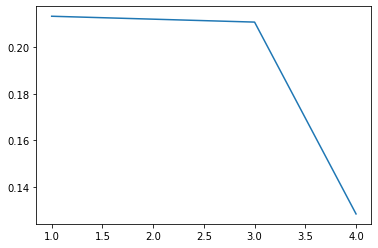

In [49]:
plt.plot(defective, factory['probability'])
plt.show()

In [52]:
factory

,defective,frequency,probability,expected
0,1,9,0.213301,5.759114
1,3,9,0.210784,5.691180
2,4,9,0.128315,3.464506


In [50]:
sc.poisson.pmf(factory['defective'], mean)


array([0.21330051, 0.21078446, 0.12831504])

In [51]:
sc.chisquare(factory["frequency"], factory["expected"])[1]

0.0018436934000382857

## Question 4
A quality control engineer takes a simple of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

In [ ]:
# your answer here

## Question 5
A researcher gathers information about the patterns of physical activity (AF) of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (1 = Low, 2 = Medium, 3 = High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (1 = consumed, 0 = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table5.png)

In [ ]:
#your answer here